**IST664 - Lab for Week 2**

As a reminder, a corpus (plural: corpora) is simply a  body of text. Corpus-linguistic analyses are often based on the evaluation of word occurrence frequencies within a corpus or across corpora. Conducting corpus-linguistic analyses usually begins with pre-processing and tokenizing the texts.

In this lab session, we will use NLTK to do some of these tasks. Similarly to last week, we will use some text from Project Gutenberg texts. This time, however, we are going to work with "raw" text rather than the pre-processed data structures that NLTK also provides, so that we can do some more detailed work. In particular, we are going to make our own token lists, filter them, and use some tools that calculate ocurrence frequencies. Note that documentation on how to create and manipulate corpora appears in this chapter of the NLTK book: http://www.nltk.org/book/ch02.html

In [1]:
# In this code, we import the NLTK, download the Gutenberg texts, extract a
# list of file identifiers from the downloaded material and show the filename
# for the first file in the list, Emma, by Jane Austen.

import nltk # Bring in the NLP toolkit
nltk.download('gutenberg') # Then import the Gutenberg library, which has books
print(nltk.corpus.gutenberg.fileids())
file0 = nltk.corpus.gutenberg.fileids()[0] # Extract the book names
print(file0)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
austen-emma.txt


In [3]:
emmatext = nltk.corpus.gutenberg.raw(file0) # Get the raw text of the book
print (len(emmatext)) # This tells the length of the string
type(emmatext) # And this shows the type of the emmatext object.

# What function call could we add to get a "directory" of all of the attributes
# of emmatext, including the bound methods?

dir(emmatext)
# 2.1: Add the function call above and then rerun this cell.


887071


['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',


We now have the text as a string of characters, and the len() function has told us how many characters are in that text. The type() function has shown us that the data type is "str" for string. Remember that in Python a string is an immutable type that we can "slice" using the square brackets slicing technique.

In [4]:
emmatext[:120] # Show the first 120 characters

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nan'

**Part 1 - Tokenization**

As you know from the readings, tokenizing seems easy but has many complications. There are many code implementations of tokenization (in a variety of programming languages). NLTK has several tokenizers available to break  raw text into tokens; we will start by using one called "punkt," that was trained on news articles. This tokenizer separates by white space and by special characters (punctuation), but also is smart enough to avoid certain splits that should probably not occur, such as "Mr."

In [5]:
nltk.download('punkt') # Punkt is a sentence tokenizer
emmatokens = nltk.word_tokenize(emmatext) # Break the string into tokens

type(emmatokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


list

In [6]:
len(emmatokens) # How many tokens before we do any other transformations?


191785

In [7]:
# Now just out of curiosity, what is the average number of characters in
# each token? Add a line of code that divides the total number of characters
# in the book by the total number of tokens.

# 2.2: Add a computation for the average number of characters per token.
len(emmatext)/len(emmatokens)

4.625340876502333

In [8]:
# Next, we will use a list comprehension to process each token into lowercase.
emmawords = [w.lower() for w in emmatokens]
len(emmawords) # How many after the lowercase transformation?


191785

In [9]:
emmawords[:20] # What are the first 20 tokens (unsorted)

['[',
 'emma',
 'by',
 'jane',
 'austen',
 '1816',
 ']',
 'volume',
 'i',
 'chapter',
 'i',
 'emma',
 'woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich']

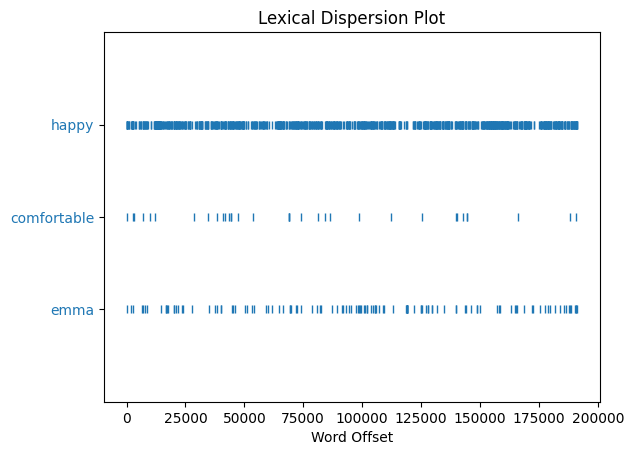

In [10]:
emmatextText = nltk.Text(emmawords)
emmatextText.dispersion_plot(['emma', 'comfortable', 'happy'])

Check out the items shown above: We will probably want to get rid of the tokens containing punctuation and other special characters. We can do a simple treatment here based on Python’s string methods. One of the methods is s.isalpha() that checks if s is non-empty and all characters in s are alphabetic. If s meets this condition, then s.isalpha() has a True value, otherwise its value is False. So we can fill the list revisedemmawords as follows:

In [11]:
# Here's another list comprehension: This one retains a token only if it
# passes the isalpha() test. Note that we use emmawords as our source list
# here, so we will (intentionally) not end up with a unique vocabulary list.
revisedemmawords = [w for w in emmawords if w.isalpha()] # Only keep alpha tokens
revisedemmawords[:20]

['emma',
 'by',
 'jane',
 'austen',
 'volume',
 'i',
 'chapter',
 'i',
 'emma',
 'woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy']

In [12]:
# Here we use the set() function to create a list of unique
# token values. We will call this "emmavocab" because this is the
# unique vocabulary of words, numbers, and punctuation from the book.
emmavocab = sorted(set(revisedemmawords)) # Now sort them
emmavocab[:20] # And look at the first 20 in sorted order

['a',
 'abbey',
 'abbots',
 'abdy',
 'abhor',
 'abhorred',
 'abide',
 'abilities',
 'able',
 'abode',
 'abolition',
 'abominable',
 'about',
 'above',
 'abroad',
 'abrupt',
 'abruptly',
 'abruptness',
 'absence',
 'absences']

In [13]:
# Next, try a list comprehension and the s.isnumeric() test to create a new list
# of all the tokens in emmawords that are purely numeric. Show a list of
# all of those tokens. You can borrow and modify the code from the previous
# cell, but make sure to assign to a new variable name such as emmanumbers.

# 2.3: Create and show a list of tokens that are numbers.

revisedemmanumbers = [w for w in emmawords if w.isnumeric()] # Only keep alpha tokens
revisedemmanumbers[:20]

['1816']

**Part 2 - Frequency Distribution**

NLTK offers a set of functions that create and manipulate a data structure called a Frequency Distribution or FreqDist. This structure is a specialized class that is an extension of the powerful Python dictionary data type.  We can import it from the nltk probability module. This class allows you to make a Frequency Distribution just by initializing it with a list of words.  It will do all the counting for you and create a distribution in which the set of keys are all the words, and the set of values are the frequency (count) of each word. See Table 2.1 in this chapter of the NLTK book:
http://www.nltk.org/book_1ed/ch01.html


In [14]:
from nltk import FreqDist
fdist = FreqDist(revisedemmawords) # This creates a list of frequencies for words
type(fdist)

nltk.probability.FreqDist

In [15]:
dir(fdist) # These are the attributes of the object
# Check out how the end of the list shows all of the methods

['B',
 'N',
 'Nr',
 '_N',
 '__add__',
 '__and__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__isub__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__missing__',
 '__module__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_cumulative_frequencies',
 '_keep_positive',
 'clear',
 'copy',
 'elements',
 'freq',
 'fromkeys',
 'get',
 'hapaxes',
 'items',
 'keys',
 'max',
 'most_common',
 'pformat',
 'plot',
 'pop',
 'popitem',
 'pprint',
 'r_Nr',
 'setdefault',
 'subtract',
 'tabulate',
 'total',
 'update',
 'values']

In [16]:
 # Let's see the bound methods associated with this type.
[m for m in dir(fdist) if m[0:1]!='_'] # Ignore the private attributes

['B',
 'N',
 'Nr',
 'clear',
 'copy',
 'elements',
 'freq',
 'fromkeys',
 'get',
 'hapaxes',
 'items',
 'keys',
 'max',
 'most_common',
 'pformat',
 'plot',
 'pop',
 'popitem',
 'pprint',
 'r_Nr',
 'setdefault',
 'subtract',
 'tabulate',
 'total',
 'update',
 'values']

In [17]:
# Note that the list of bound methods above includes "keys()." In Python
# a dictionary has "key-value" pairs. Python uses highly efficient
# methods to help you find a "key" and return the associated "value."
fdistkeys = list(fdist.keys()) # The keys are the words/tokens
fdistkeys[:20] # Look at the first 20 keys/words

['emma',
 'by',
 'jane',
 'austen',
 'volume',
 'i',
 'chapter',
 'woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a',
 'comfortable',
 'home',
 'happy',
 'disposition',
 'seemed',
 'to']

In [18]:
# Because this class behaves like a dictionary, we can supply the
# name of a key and Python will return the associated value.

fdist['the'] # Look at the frequency of one word

5201

In [19]:
# Look back a couple of cells for the bound method list and you will also
# see most_common, which will give us a list of the key-value pairs with
# the highest frequencies.
topkeys = fdist.most_common(20)

# In this for loop, "pair" refers to the word together with its frequency value
for pair in topkeys:
    print (pair)

('the', 5201)
('to', 5181)
('and', 4877)
('of', 4284)
('i', 3177)
('a', 3124)
('it', 2503)
('her', 2448)
('was', 2396)
('she', 2336)
('not', 2281)
('in', 2173)
('be', 1970)
('you', 1967)
('he', 1806)
('that', 1805)
('had', 1623)
('but', 1441)
('as', 1436)
('for', 1346)


In [20]:
# You can tell by the parentheses above that each entry in topkeys is a tuple.
# Remember that tuples are immutable, so each key is "glued" to its
# corresponding frequency value, which can't be changed.
type(topkeys[0])

tuple

In [21]:
# We can use slicing to get at the individual elements in this list of tuples
# but it is often more convenient to use the bound methods to analyze
# our frequency data.
for item in topkeys:
  print("The word", item[0], "occurs", item[1], "times.")

The word the occurs 5201 times.
The word to occurs 5181 times.
The word and occurs 4877 times.
The word of occurs 4284 times.
The word i occurs 3177 times.
The word a occurs 3124 times.
The word it occurs 2503 times.
The word her occurs 2448 times.
The word was occurs 2396 times.
The word she occurs 2336 times.
The word not occurs 2281 times.
The word in occurs 2173 times.
The word be occurs 1970 times.
The word you occurs 1967 times.
The word he occurs 1806 times.
The word that occurs 1805 times.
The word had occurs 1623 times.
The word but occurs 1441 times.
The word as occurs 1436 times.
The word for occurs 1346 times.


In corpus linguistics, a hapax legomenon is a word or an expression that occurs just once within a corpus. NLTK provides a bound method for accessing the list of hapaxes. For certain kinds of text analysis, these might be good words to ignore, because they are so rare, but on the other hand they could be useful for searches because of their uniqueness!

In [22]:
len(fdist.hapaxes()) # How many tokens occur just once?

2685

In [23]:
fdist.max() # Which is the most frequent token?

'the'

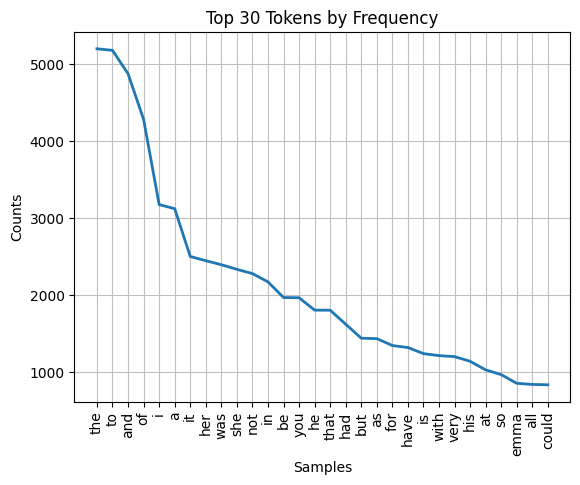

<Axes: title={'center': 'Top 30 Tokens by Frequency'}, xlabel='Samples', ylabel='Counts'>

In [27]:
# Using the bound method plot(), we can make a frequency plot:
fdist.plot(30, title="Top 30 Tokens by Frequency")

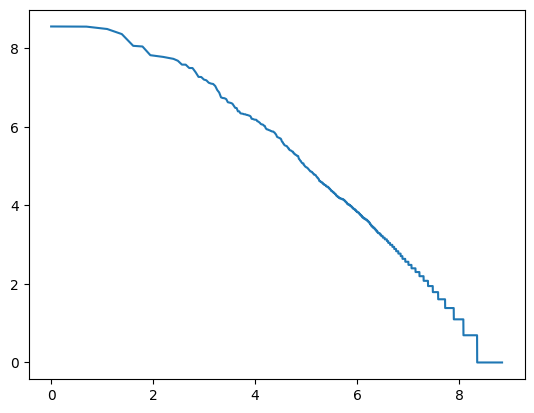

In [28]:
# A brief illustration of Zipf's law
import math # We will need the log() function
import matplotlib.pyplot as plt # And we will make a simple plot

# Calculate a list of the logs of the word frequency values using
# a list comprehension and sorting from largest to smallest.
log_freqs = [math.log(v) for v in sorted(fdist.values(), reverse=True)]

# Make a list of integers (i.e., ranks) and calculate their logs
log_ranks = [math.log(r+1) for r in range(len(log_freqs))]

plt.plot(log_ranks, log_freqs) # Show the result

Now you repeat the word frequency analysis process with a new book, Jane Austen's *Persuasion*. This is the last complete book Austen wrote and it is considerably shorter than *Emma*. Even so, Zipf's law should still hold! The setup code for producing a list of lowercase, alpha-only tokens, appears below. Add some lines of code in the next block to conduct the frequency analysis and finish up with a Zipf plot.

In [29]:
file1 = nltk.corpus.gutenberg.fileids()[1] # Extract the second book name
persuasiontext = nltk.corpus.gutenberg.raw(file1) # Get the raw text
persuasiontokens = nltk.word_tokenize(persuasiontext) # Tokenize
persuasionwords = [w.lower() for w in persuasiontokens]
alphapersuasion = [w for w in persuasionwords if w.isalpha()]
len(alphapersuasion)

83013

2.5: 
('the', 3328)
('and', 2786)
('to', 2782)
('of', 2568)
('a', 1592)
('in', 1383)
('was', 1337)
('her', 1203)
('had', 1186)
('she', 1146)
('i', 1123)
('it', 1038)
('not', 976)
('he', 961)
('be', 950)
('that', 882)
('as', 809)
('for', 707)
('but', 664)
('his', 659)

2.6:  3328

2.7


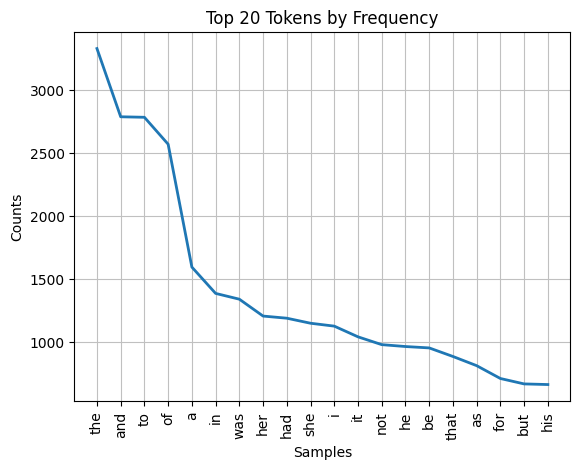


2.8


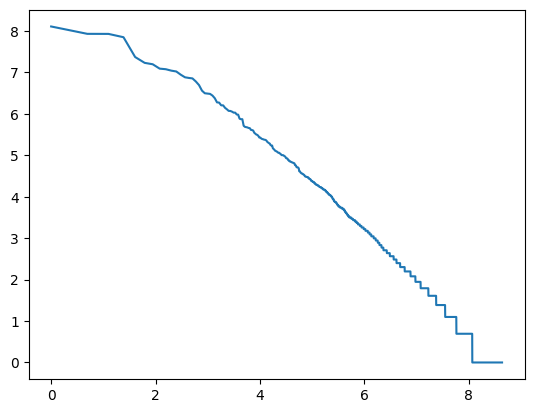

In [47]:
# Use alphapersuasion in these analyses. Contrast the results of these
# analyses with those above for Emma.

# 2.4: Create a FreqDist using NLTK's function for this purpose

from nltk import FreqDist
fdist = FreqDist(alphapersuasion)

# 2.5: Show the 20 most common words in the FreqDist dictionary
topkeys = fdist.most_common(20)

print("2.5: ")
for pair in topkeys:
    print (pair)

# 2.6: Show the frequency of the word "the"
print("\n2.6: ", fdist['the'] )


# 2.7: Plot the top 20 tokens by frequency

print("\n2.7")
fdist.plot(20, title="Top 20 Tokens by Frequency")

# 2.8: Develop a Zipf plot and write a comment describing its shape.

# A brief illustration of Zipf's law
print("\n2.8")
import math # We will need the log() function
import matplotlib.pyplot as plt # And we will make a simple plot

# Calculate a list of the logs of the word frequency values using
# a list comprehension and sorting from largest to smallest.
log_freqs = [math.log(v) for v in sorted(fdist.values(), reverse=True)]

# Make a list of integers (i.e., ranks) and calculate their logs
log_ranks = [math.log(r+1) for r in range(len(log_freqs))]

plt.plot(log_ranks, log_freqs) # Show the result


# Does the plot for Persuasion seem to conform to Zipf's law?

**Part 3 - Regular Expression and Tokenization**

In this next phase of the lab, we will begin a deeper exploration of tokenization. Additionally, we will continue our exploration of corpus liguistics by looking at bigrams. We will start with a simple introduction to regular expressions - a kind of language-within-a-language for pattern matching. We will use Python's "re" package for regular expressions. The re.compile() function preprocesses our pattern so that it can easily be reused.

In [48]:
# Rather than a whole book, let's just work with one sentence:
sentence = "thomas jefferson began building monticello at the age of twenty-six."

# Now get set up to build a regular expression
import re
pattern = re.compile('^[a-z]+')
type(pattern) # What is it?

re.Pattern

In [54]:
# Let's see what this pattern can do for us
print(pattern.match(sentence)) # Show the details of when a match occurs

<re.Match object; span=(0, 6), match='thomas'>


So the pattern that we saved using this command, re.compile('^[a-z]+'), looks for the start of a string with the ^ character, followed by any number of the characters a through z (lowercase). This yielded one match that starts at character zero and goes for six characters in total. So we have successfully parsed the first word of the sentence, but what about the rest? Let's do two things: first, if we get rid of the ^ then we won't just match at the beginning of the sentence. Second, if we use findall() instead of match(), we can get a complete list of matches rather than just the first one.

In [52]:
pattern = re.compile('[a-z]+')
print(pattern.findall(sentence))

['thomas', 'jefferson', 'began', 'building', 'monticello', 'at', 'the', 'age', 'of', 'twenty', 'six']


Note that we have saved all the words and discarded the spaces and the punctuation, including the dash in the hyphenated phrase, twenty-six. Python provides a similar capability with the .split() bound method that can be applied to any string:

In [55]:
# Space is the default for the splitting character, but we provide it explicitly
# here just to make the point that this is what the method does.
sentence.split(sep=' ')


['thomas',
 'jefferson',
 'began',
 'building',
 'monticello',
 'at',
 'the',
 'age',
 'of',
 'twenty-six.']

In [56]:
# Note how the punctuation is retained in the example above and here.
# A regular expression can also be used to do splits, like this pattern
# that matches any number of whitespace characters and performs splits
# using those matches:
spattern = re.compile('\s+')
spattern.split(sentence)

['thomas',
 'jefferson',
 'began',
 'building',
 'monticello',
 'at',
 'the',
 'age',
 'of',
 'twenty-six.']

In both of the preceding examples, you should be able to explain why the final token contains both the dash character and the period. What do you think of this result? Is it better to keep dashes in hyphenated phrases? Should punctuation tokens like periods be peeled off into separate tokens?

In [57]:
# The NLTK package also contains a tokenizer that can use regular expressions
# to do the splitting. Here's an example:
from nltk.tokenize import RegexpTokenizer

# This matches \w (any word character) or any number of characters that are not a space.
my_tokenizer = RegexpTokenizer(r'\w+|\S+')
my_tokenizer.tokenize(sentence)

['thomas',
 'jefferson',
 'began',
 'building',
 'monticello',
 'at',
 'the',
 'age',
 'of',
 'twenty',
 '-six.']

In [58]:
sentence = "thomas jefferson began building monticello at the age of twenty-six "
my_tokenizer = RegexpTokenizer(r'\w+|\s+')
my_tokenizer.tokenize(sentence)

['thomas',
 ' ',
 'jefferson',
 ' ',
 'began',
 ' ',
 'building',
 ' ',
 'monticello',
 ' ',
 'at',
 ' ',
 'the',
 ' ',
 'age',
 ' ',
 'of',
 ' ',
 'twenty',
 'six',
 ' ']

**Part 4 - Ngram and Mutual Information**

The complete set of examples above demonstrate that even for this one relatively simple sentence, a tokenizer can be programmed to behave in many different ways. We see variation, in particular, around the handling of hyphenated words and punctuation. Other important issues surround the handling of contractions, abbreviations, numeric strings, and multi-word noun phrases such as New york or New York City. One way of capturing more contextual information in our token lists is to group tokens in sets of two or more. Two tokens together is called a bigram, three is called a trigram, and more generally any number "n" is called an ngram. NLTK and other language packages contain numerous tools for working with bigrams. Let's look at the output of the NLTK ngrams() function:

In [59]:
from nltk.util import ngrams
pattern = re.compile('[a-z]+')
tokens = pattern.findall(sentence)
list(ngrams(tokens, 2))

[('thomas', 'jefferson'),
 ('jefferson', 'began'),
 ('began', 'building'),
 ('building', 'monticello'),
 ('monticello', 'at'),
 ('at', 'the'),
 ('the', 'age'),
 ('age', 'of'),
 ('of', 'twenty'),
 ('twenty', 'six')]

In [60]:
# We can easily repeat the process for trigrams:
list(ngrams(tokens, 3))

[('thomas', 'jefferson', 'began'),
 ('jefferson', 'began', 'building'),
 ('began', 'building', 'monticello'),
 ('building', 'monticello', 'at'),
 ('monticello', 'at', 'the'),
 ('at', 'the', 'age'),
 ('the', 'age', 'of'),
 ('age', 'of', 'twenty'),
 ('of', 'twenty', 'six')]

It should be pretty clear what's happening in both of the previous cells. Also, it may not seem especially useful, but research has shown that there is great value in understanding the context around words - i.e., the other words that occur nearby. In fact, this was an idea called "the distributional hypothesis" imagined by linguist Zellig Harris, that words with similar meanings tend to occur in similar contexts.

In [61]:
# We can make ngram tokens from these lists.
bigrams = [" ".join(w) for w in ngrams(tokens, 2)]
print(bigrams)

['thomas jefferson', 'jefferson began', 'began building', 'building monticello', 'monticello at', 'at the', 'the age', 'age of', 'of twenty', 'twenty six']


In [62]:
# Given only one sentence, that result is not very exciting, but what if
# we did a whole book?

#Note that we use emmawords as input when creating bigrams not revisedemmawords
emmabigrams = [" ".join(w) for w in ngrams(emmawords, 2)]

fdist = FreqDist(emmabigrams) # This creates a list of frequencies for bigrams
len(fdist) # This is the total number of unique bigrams

63236

In [63]:
fdist.most_common(20)

[(', and', 1882),
 (". ''", 1157),
 ("'' ``", 959),
 ('; and', 867),
 ('to be', 605),
 (", ''", 584),
 ('. i', 570),
 (', i', 569),
 ('of the', 559),
 ('in the', 445),
 ('it was', 442),
 ('; but', 427),
 ('. ``', 416),
 ('. she', 413),
 ('i am', 394),
 (', that', 360),
 ('! --', 344),
 ('-- and', 334),
 ('she had', 332),
 ('she was', 328)]

Give some thought to what many of those most frequent bigrams have in common. If our main goal was to understand key meanings or themes in the text, would this help us at all? How could we preprocess our book differently to produce a more interesting result?

In [64]:
nltk.download('stopwords') # Let's try taking out the stopwords beforehand

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [65]:
nltk_stops = nltk.corpus.stopwords.words('english')
nltk_stops[:10] # Examine the first few

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [68]:
# Add a line of code to show how many stop words are in our list. Do an online
# search to see how this compares with other stop word lists.

# 2.9: How many stop words in nltk_stops?
len(nltk_stops)

179

In [74]:
# Use a list comprehension to remove stop words
emmanostops = [w for w in revisedemmawords if w not in nltk_stops]

# Compare the lengths of the token lists before and after stop word removal
print(len(revisedemmawords) - len(emmanostops))
print("1",len(revisedemmawords))
print("2",len(emmanostops))

87421
1 157044
2 69623


Crikey! We've taken out more than 87,000 tokens from our original set of about 191,000. That's quite a reduction. What remains is just the bare bones of each sentence, but if we create a new batch of bigrams, they might be better for not having all of those stop words. HOWEVER, we cannot create bigrams out of the list that has stopwords removed, just as above we cannot create bigrams out of the list that has punctuation marks removed. We need to first create bigrams from the raw list (i.e., the one that just has lowercase function applied) and we filter the bigrams that include the punctuation marks or other non-alphabetic tokens and filter those that include the stopwords.

In [75]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(emmawords)
scored = finder.score_ngrams(bigram_measures.raw_freq)
dir(finder)


['N',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply_filter',
 '_build_new_documents',
 '_ngram_freqdist',
 '_score_ngrams',
 'above_score',
 'apply_freq_filter',
 'apply_ngram_filter',
 'apply_word_filter',
 'default_ws',
 'from_documents',
 'from_words',
 'nbest',
 'ngram_fd',
 'score_ngram',
 'score_ngrams',
 'window_size',
 'word_fd']

In [77]:
def alpha_filter(w):
  # pattern to match word of non-alphabetical characters
  pattern = re.compile('^[^a-z]+$')
  if (pattern.match(w)):
    return True
  else:
    return False

finder.apply_word_filter(alpha_filter)
scored = finder.score_ngrams(bigram_measures.raw_freq)
for bscore in scored[:30]:
    print (bscore)

(('to', 'be'), 0.0031545741324921135)
(('of', 'the'), 0.0029147222149803163)
(('in', 'the'), 0.0023203065933206455)
(('it', 'was'), 0.0023046640769611806)
(('i', 'am'), 0.00205438381520974)
(('she', 'had'), 0.0017311051437807962)
(('she', 'was'), 0.0017102484553015095)
(('had', 'been'), 0.0016007508407852543)
(('it', 'is'), 0.0015538232917068592)
(('i', 'have'), 0.0014651823656698908)
(('could', 'not'), 0.0014495398493104257)
(('mr.', 'knightley'), 0.0014234689887113175)
(('of', 'her'), 0.0013556847511536356)
(('mrs.', 'weston'), 0.0012826863414761322)
(('have', 'been'), 0.0012566154808770237)
(('he', 'had'), 0.0012514013087572022)
(('to', 'the'), 0.001235758792397737)
(('do', 'not'), 0.0012253304481580937)
(('and', 'the'), 0.0011679745548400552)
(('he', 'was'), 0.0011575462106004119)
(('would', 'be'), 0.0011210470057616603)
(('mr.', 'elton'), 0.0011001903172823736)
(('such', 'a'), 0.001042834423964335)
(('a', 'very'), 0.0010324060797246917)
(('of', 'his'), 0.0009906927027661184)
(('th

In [78]:
finder.apply_word_filter(lambda w: w in nltk_stops)
scored = finder.score_ngrams(bigram_measures.raw_freq)
for bscore in scored[:30]:
    print (bscore)

(('mr.', 'knightley'), 0.0014234689887113175)
(('mrs.', 'weston'), 0.0012826863414761322)
(('mr.', 'elton'), 0.0011001903172823736)
(('miss', 'woodhouse'), 0.0008864092603696848)
(('mr.', 'weston'), 0.0008238391949318247)
(('frank', 'churchill'), 0.0007508407852543212)
(('mrs.', 'elton'), 0.0007299840967750345)
(('mr.', 'woodhouse'), 0.0006830565476966395)
(('every', 'thing'), 0.0006465573428578878)
(('miss', 'fairfax'), 0.0006361289986182444)
(('miss', 'bates'), 0.0005787731053002059)
(('every', 'body'), 0.0005683447610605626)
(('jane', 'fairfax'), 0.0005474880725812759)
(('harriet', "'s"), 0.00044841880230466407)
(('young', 'man'), 0.00043277628594519906)
(('emma', "'s"), 0.00038584873686680395)
(('great', 'deal'), 0.00033370701566858723)
(('elton', "'s"), 0.0003232786714289439)
(('emma', 'could'), 0.0003180644993091222)
(('said', 'emma'), 0.0003076361550694788)
(('miss', 'smith'), 0.00029720781082983547)
(('john', 'knightley'), 0.00028677946659019213)
(('mrs.', 'goddard'), 0.0002711

Several of these bigrams now show us many major characters from the book. Here's an incomplete list excerpted from Sparknotes.com:

* Emma Woodhouse: The protagonist of the novel.
* John Knightley: Emma’s brother-in-law.
* Harriet Smith: Emma’s protégé and the object of her matchmaking schemes.
* Miss Bates: A middle-aged spinster.
* Jane Fairfax: Miss Bates’s niece.
* Frank Churchill: Mr. Weston’s son and Mrs. Weston’s stepson.

So the upshot of removing stop words and conducting a very simple frequency analysis of the remaiing bigrams is that we now have a meaningful insight into the contents of the book. As an exercise, let's extend this analysis to trigrams. You can copy some of the code above and make some minor changes to create a frequency distribution of trigrams.

In [84]:
# Copy the code from the cell above where we create emmabigrams
# and modify it to create trigrams. Create a frequency distribution and
# show the top 20 results.

# 2.10: Create trigrams
emmatrigrams = [" ".join(w) for w in ngrams(emmawords, 3)]

 # This creates a list of frequencies for bigrams
len(fdist)

# 2.11: Create frequency distribution

fdist = FreqDist(emmatrigrams)

# 2.12: Show top 20 results
fdist.most_common(20)


[(". '' ``", 758),
 (", '' said", 225),
 ("? '' ``", 147),
 ("'' `` i", 136),
 ('i do not', 135),
 ('. it was', 117),
 ('i am sure', 107),
 (', however ,', 89),
 (', and the', 89),
 (', my dear', 87),
 ('miss woodhouse ,', 86),
 ('. she was', 85),
 (". '' emma", 79),
 ('. `` i', 78),
 (', i am', 78),
 ('`` oh !', 76),
 ('. i am', 75),
 ('mr. knightley ,', 75),
 ('mrs. weston ,', 73),
 ('she could not', 72)]

Take note of how small the frequencies have gotten. Do these three word phrases add to your understanding of the text? As you look at this list, would you consider any of these trigrams to be "nuisance" instances (i.e., they are contaminated by words we might not want to see)? Are there any additional steps you could take to "clean up" these results?  

The final step for this lab is to consider the concept of "pointwise mutual information" (PMI). When we are dealing with data such as lists of bigrams or trigrams, we often would like to have a method of sifting the data to find the most interesting examples. PMI calculates the probability of the co-occurence of two words versus the probability of each word independently. Here's an example: Let's say that "fish" occurs five times in 100 words, while "cake" appears eight times. The combination "fish cake" appears 3 times. Now run the code below:

In [86]:
pfish = 5/100
pcake = 8/100
pfishcake = 3/100

import math # We will need the log() function
pmi = math.log( pfishcake / (pfish * pcake))
print(pmi)

2.0149030205422647


Loosely speaking, this result suggests that the appearance of "fish cake" is about twice as likely as one might have expected, just by looking at the raw probabilities of "fish" and "cake." As such, PMI is a measure of interestingness that will allow us to score each bigram. We could rig up some for loops to do this for us, but let's tap into a capability that NLTK provides.

In [87]:
from nltk.collocations import BigramAssocMeasures # We need two modules
from nltk.collocations import BigramCollocationFinder

# Here we are creating instances of two classes. The first is a
# bigram measurer of the class nltk.metrics.association.BigramAssocMeasures.
# The second is a locator function that is initialized with the tokens from Emma.
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder4 = BigramCollocationFinder.from_words(emmawords)
type(bigram_measures), type(finder4)

(nltk.metrics.association.BigramAssocMeasures,
 nltk.collocations.BigramCollocationFinder)

In [88]:
# The NLTK Pointwise Mutual Information scoring function. PMI scores
# the bigrams by taking into account the frequency of the two
# component words. When infrequent words make a bigram they get
# a boost in PMI. A higher score thus means a more interesting
# bigram.
finder4.apply_freq_filter(5)
scored = finder4.score_ngrams(bigram_measures.pmi)
for bscore in scored[:30]:
    print (bscore)

(('d', "'ye"), 14.964167861580208)
(('sore', 'throat'), 14.089698743664066)
(('brunswick', 'square'), 13.952195219914133)
(('william', 'larkins'), 13.089698743664067)
(('baked', 'apples'), 12.964167861580208)
(('box', 'hill'), 12.736061789049367)
(('sixteen', 'miles'), 12.613670614496076)
(('maple', 'grove'), 12.594934051914489)
(('hair', 'cut'), 12.063703535131124)
(('south', 'end'), 11.96416786158021)
(('colonel', 'campbell'), 11.412234161246522)
(('protest', 'against'), 11.347496501131715)
(('robert', 'martin'), 11.093935736550536)
(('five', 'couple'), 10.841771230220482)
(('vast', 'deal'), 10.76253400041056)
(('ready', 'wit'), 10.652293431356767)
(('donwell', 'abbey'), 10.519383018907314)
(('musical', 'society'), 10.509114683453486)
(('infinitely', 'superior'), 10.230813520966382)
(('married', 'women'), 10.05727726597169)
(('five', 'minutes'), 10.032714012931878)
(('years', 'ago'), 9.9575041312992)
(('three', 'months'), 9.941800048551755)
(('depend', 'upon'), 9.928125111654678)
(('